In [48]:
import numpy as np
import random

# customers
class Customer:
    
    def __init__(self, number, arrival_time, queue_time = 0, service_time = 6, auto_service = False):
        self.number = number
        self.arrival_time = arrival_time
        self.queue_time = queue_time
        self.service_time = int(np.random.poisson(service_time, 1))
        if(random.randint(1,101) < 26):
            self.auto_service = True
            self.service_time = int(np.random.poisson(3, 1))
            


In [49]:
def simulate(queue_times, service_times, system_times):
    t=0
    queue = []
    tot_arr = 0
    show_up= True
    customer_number = 1
    served_customers = []
    
    # initialize servers
    cashier1_available = True
    cashier1_time_remaining = 0
    cashier2_available = True
    cashier2_time_remaining = 0
    self1_available = True
    self1_time_remaining = 0
    self2_available = True
    self2_time_remaining = 0


    while t < 720: # while store is open (minutes/day)

        if show_up == True: # create inter arrival times
            at = int(np.random.poisson(3, 1)) + 1
            tot_arr += at
            show_up = False


        if t == tot_arr: # make new customers join the queue
            queue.append(Customer(customer_number, at))
            show_up = True
            customer_number += 1

        # Cashiers
            
        if cashier1_available and queue: #make queued customer join cashier 1
            served_customers.append(queue.pop(0))
            cashier1_available = False
            cashier1_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier1_time_remaining -= 1

        if cashier1_time_remaining == 0: #open cashier 1 when customer leaves
            cashier1_available = True

        if cashier2_available and queue: #make queued customer join cashier 2
            served_customers.append(queue.pop(0))
            cashier2_available = False
            cashier2_time_remaining = served_customers[len(served_customers)-1].service_time + 1

        cashier2_time_remaining -= 1

        if cashier2_time_remaining == 0: #open cashier 2 when customer leaves
            cashier2_available = True
        
        # Self Checkouts
        
        self1_auto_candidate = 0

        for customer in queue:
            
            if self1_available and queue and auto_service: #make queued customer join self 1
                served_customers.append(queue.pop(self1_auto_candidate))
                self1_available = False
                self1_time_remaining = served_customers[len(served_customers)-1].service_time + 1
                
            self1_auto_candidate += 1

        self1_time_remaining -= 1

        if self1_time_remaining == 0: #open self 1 when customer leaves
                self1_available = True
        
        self2_auto_candidate = 0

        for customer in queue:
            
            if self2_available and queue and auto_service: #make queued customer join self 2
                served_customers.append(queue.pop(self2_auto_candidate))
                self2_available = False
                self2_time_remaining = served_customers[len(served_customers)-1].service_time + 1
                
            self2_auto_candidate += 1

        self2_time_remaining -= 1

        if self2_time_remaining == 0: #open self 2 when customer leaves
                self2_available = True
        
        t += 1

        if queue: # add 1 minute waiting time to each customer per loop iteration
            for customer in queue:
                customer.queue_time += 1

    for customer in served_customers: # append all data to analyze later
        queue_times.append(customer.queue_time)
        service_times.append(customer.service_time)
        system_times.append(customer.queue_time + customer.service_time)
           

In [50]:
queue_times = []
service_times = []
system_times = []
auto_service = []

for i in range(1000): # how many times to run simulation
    simulate(queue_times, service_times, system_times)

(0, 180000)

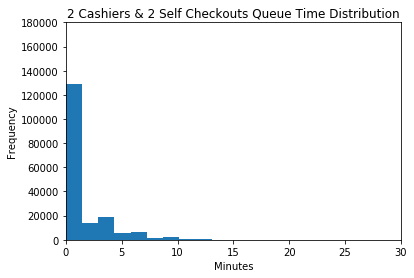

In [61]:
import matplotlib.pyplot as plt

plt.hist(queue_times, bins = 20)

# Add title and axis names
plt.title('2 Cashiers & 2 Self Checkouts Queue Time Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Limits for the X axis
plt.xlim(0,30)
plt.ylim(0,180000)

(array([3.76338714e-02, 0.00000000e+00, 1.27611300e-01, 0.00000000e+00,
        0.00000000e+00, 2.32768654e-01, 0.00000000e+00, 3.23789427e-01,
        0.00000000e+00, 0.00000000e+00, 3.71621622e-01, 0.00000000e+00,
        0.00000000e+00, 3.85478998e-01, 0.00000000e+00, 3.49197066e-01,
        0.00000000e+00, 0.00000000e+00, 2.87110730e-01, 0.00000000e+00,
        0.00000000e+00, 2.10388183e-01, 0.00000000e+00, 1.39352597e-01,
        0.00000000e+00, 0.00000000e+00, 8.19245736e-02, 0.00000000e+00,
        4.43788721e-02, 0.00000000e+00, 0.00000000e+00, 2.28507106e-02,
        0.00000000e+00, 0.00000000e+00, 1.02424086e-02, 0.00000000e+00,
        4.62892209e-03, 0.00000000e+00, 0.00000000e+00, 1.63114398e-03,
        0.00000000e+00, 0.00000000e+00, 6.17189612e-04, 0.00000000e+00,
        2.35119852e-04, 0.00000000e+00, 0.00000000e+00, 8.81699446e-05,
        0.00000000e+00, 2.93899815e-05]),
 array([ 0.  ,  0.38,  0.76,  1.14,  1.52,  1.9 ,  2.28,  2.66,  3.04,
         3.42,  3.8 ,  

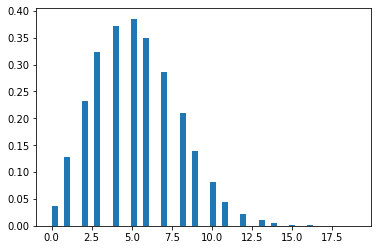

In [56]:
plt.hist(service_times, bins = 50, density=True)

(0, 30000)

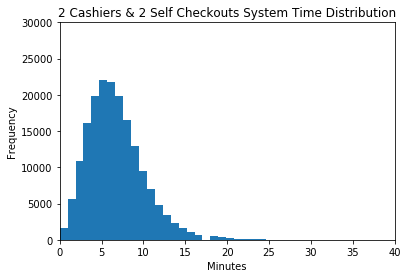

In [68]:
plt.hist(system_times, bins = 38)

# Add title and axis names
plt.title('2 Cashiers & 2 Self Checkouts System Time Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Limits for the X axis
plt.xlim(0,40)
plt.ylim(0, 30000)

In [54]:
over_time_limit = []
for i in system_times:
    if i > 10:
        over_time_limit.append(i)

len(over_time_limit)/len(system_times)

0.12490507035961582